The first few steps are to download Kaggle JSON file and to load the data from the Kaggle website in the Colab Environment.

In [ ]:
 ! pip install -q kaggle
 from google.colab import files
 files.upload()


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"darshilshah2712","key":"c7adef1344a063a2677f1bfcfd37ebc5"}'}

In [ ]:
! mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle competitions download -c 'trends-assessment-prediction'

 63% 9.00M/14.3M [00:00<00:00, 41.0MB/s]
100% 14.3M/14.3M [00:00<00:00, 56.5MB/s]
 77% 11.0M/14.2M [00:00<00:00, 31.9MB/s]
100% 14.2M/14.2M [00:00<00:00, 28.4MB/s]
 98% 14.0M/14.2M [00:00<00:00, 52.9MB/s]
100% 14.2M/14.2M [00:00<00:00, 56.3MB/s]
 91% 13.0M/14.3M [00:01<00:00, 9.87MB/s]
100% 14.3M/14.3M [00:01<00:00, 12.8MB/s]
 91% 13.0M/14.3M [00:00<00:00, 27.1MB/s]
100% 14.3M/14.3M [00:00<00:00, 28.6MB/s]
 91% 13.0M/14.3M [00:00<00:00, 17.6MB/s]
100% 14.3M/14.3M [00:00<00:00, 24.1MB/s]
 56% 8.00M/14.3M [00:00<00:00, 78.4MB/s]
100% 14.3M/14.3M [00:00<00:00, 91.0MB/s]
 63% 9.00M/14.3M [00:00<00:00, 37.0MB/s]
100% 14.3M/14.3M [00:00<00:00, 40.8MB/s]
 56% 8.00M/14.2M [00:00<00:00, 32.8MB/s]
100% 14.2M/14.2M [00:00<00:00, 40.9MB/s]
 35% 5.00M/14.3M [00:00<00:00, 42.1MB/s]
100% 14.3M/14.3M [00:00<00:00, 69.8MB/s]
 63% 9.00M/14.3M [00:00<00:00, 32.4MB/s]
100% 14.3M/14.3M [00:00<00:00, 41.0MB/s]
 35% 5.00M/14.3M [00:00<00:00, 44.2MB/s]
100% 14.3M/14.3M [00:00<00:00, 68.6MB/s]
 63% 9.00M/14.3M

In [ ]:
!unzip \*.zip  && rm *.zip

Archive:  10041.mat.zip
  inflating: 10041.mat               

Archive:  fnc.csv.zip
  inflating: fnc.csv                 

Archive:  10030.mat.zip
  inflating: 10030.mat               

Archive:  10016.mat.zip
  inflating: 10016.mat               

Archive:  10033.mat.zip
  inflating: 10033.mat               

Archive:  10026.mat.zip
  inflating: 10026.mat               

Archive:  10008.mat.zip
  inflating: 10008.mat               

Archive:  10025.mat.zip
  inflating: 10025.mat               

Archive:  10029.mat.zip
  inflating: 10029.mat               

Archive:  10028.mat.zip
  inflating: 10028.mat               

Archive:  loading.csv.zip
  inflating: loading.csv             

Archive:  10004.mat.zip
  inflating: 10004.mat               

Archive:  10020.mat.zip
  inflating: 10020.mat               

Archive:  10007.mat.zip
  inflating: 10007.mat               

Archive:  10009.mat.zip
  inflating: 10009.mat               

Archive:  10012.mat.zip
  inflating: 10012.mat         

In [ ]:
#Import Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
!pip install pynrrd

In [ ]:
targets = pd.read_csv('train_scores.csv').set_index('Id')
targets.head()

age  domain1_var1  domain1_var2  domain2_var1  domain2_var2
Id                                                                      
10001  57.436077     30.571975     62.553736     53.325130     51.427998
10002  59.580851     50.969456     67.470628     60.651856     58.311361
10004  71.413018     53.152498     58.012103     52.418389     62.536641
10005  66.532630           NaN           NaN     52.108977     69.993075
10007  38.617381     49.197021     65.674285     40.151376     34.096421

age               0
domain1_var1    438
domain1_var2    438
domain2_var1     39
domain2_var2     39
dtype: int64

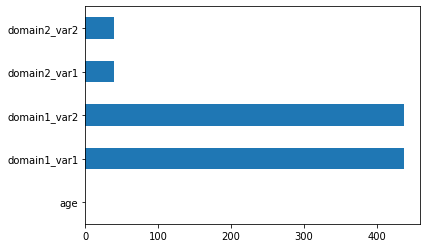

In [ ]:
#Check for null values
n_nulls = targets.isnull().sum()
display(n_nulls)
n_nulls.plot.barh();

In [ ]:
#Drop Null values
targets.dropna(inplace=True)

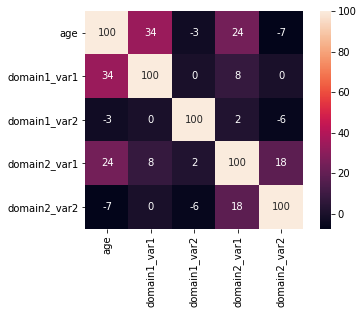

In [ ]:
sns.heatmap(targets.corr()*100, square=True, annot=True, fmt='.0f');

Observation: While there is a slight correlation within domain 2, there doesn't seem to be one within domain 1. So, the targets were measured in the same domain, but do not necessarily encode a connected property. Except for this domain2 connection

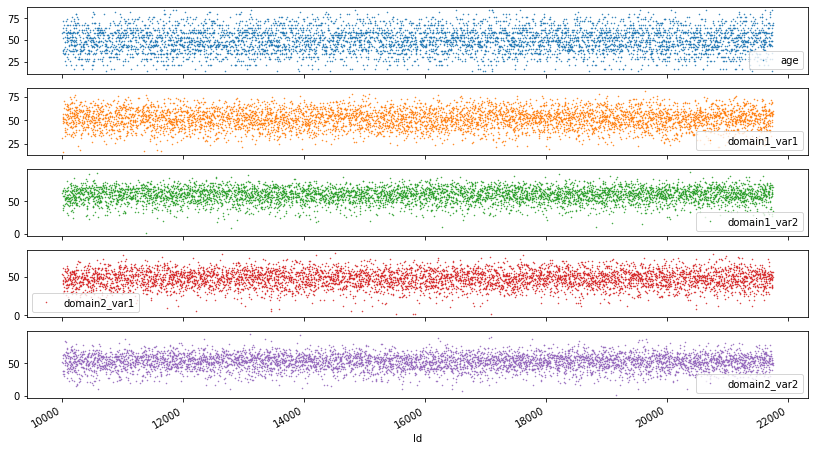

In [ ]:
targets.plot(lw=0, marker='.', markersize=1, subplots=True, figsize=(14, 8));

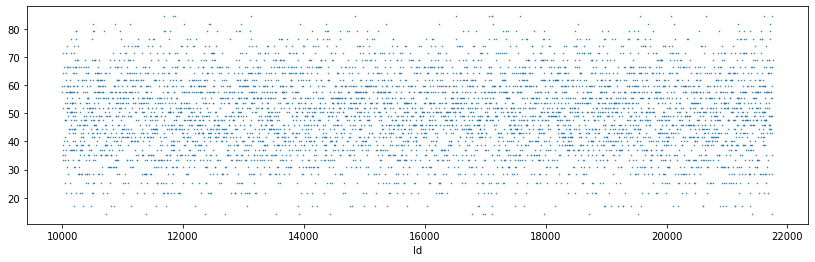

In [ ]:
targets['age'].plot(lw=0, marker='.', markersize=1, figsize=(14, 4));

In [ ]:
targets['age'].nunique()

33

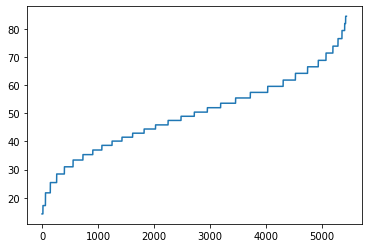

In [ ]:
#distribution of age over target
plt.plot(targets['age'].sort_values().values);

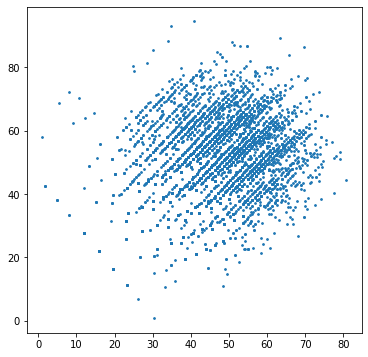

In [ ]:
plt.figure(figsize=(6, 6))
d2 = targets.dropna().iloc[:, 3:].values
plt.scatter(d2[:, 0], d2[:, 1], s=3);

In [ ]:
def rotate_origin(x, y, radians):
    xx = x * np.cos(radians) + y * np.sin(radians)
    yy = -x * np.sin(radians) + y * np.cos(radians)
    return np.array([xx, yy]).T

In [ ]:
# Function to plot unique values in a given range

def plot_unique(start,end,d2,noOfVals):
    n_uniques = []
    for r in np.linspace(start, end, noOfVals):
        d22_rot = rotate_origin(d2[:, 0], d2[:, 1], r)[:, 1]
        n_uniques.append([r, len(np.unique(np.round(d22_rot, 6)))])
    n_uniques = np.array(n_uniques)

    plt.figure(figsize=(14, 2))
    plt.scatter(n_uniques[:, 0], n_uniques[:, 1], s=3);

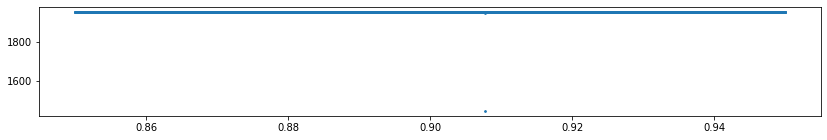

In [ ]:
# Trying for values from 0.85 to 0.95 radians
plot_unique(0.85,0.95,d2,5000)

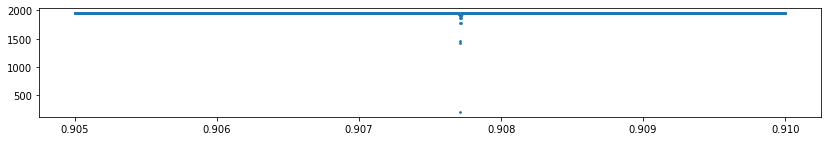

In [ ]:
# As we can see sudden drop, trying for values from 0.905 to 0.910 radians
plot_unique(0.905,0.910,d2,5000)

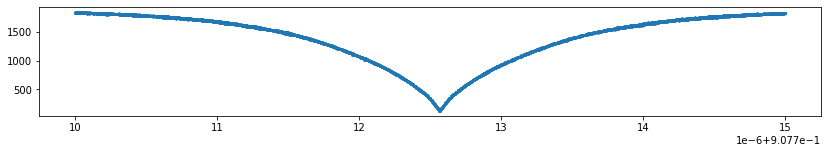

In [ ]:
# Trying for values from 0.90771 to 0.907715 radians
plot_unique(0.90771,0.907715,d2,5000)

In [ ]:
# rgets = pd.read_csv(opj(path, 'train_scores.csv')).set_index('Id')
# Let's also create the rotated domain2 targets
rot = 0.90771256655
d2 = rotate_origin(targets.iloc[:, 3].values, targets.iloc[:, 4].values, rot)
targets['d21_rot'] = d2[:, 0]
targets['d22_rot'] = d2[:, 1]

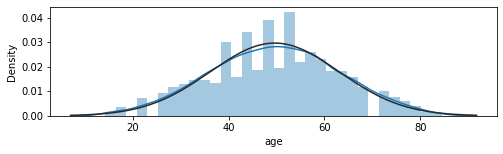

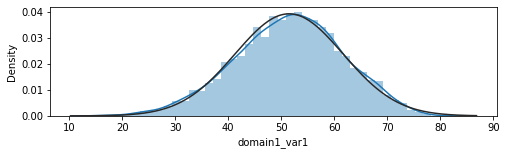

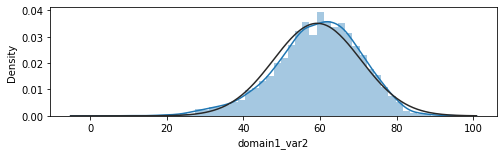

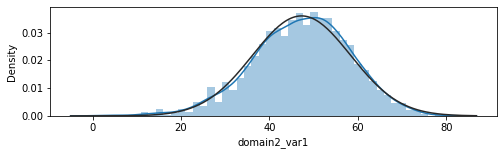

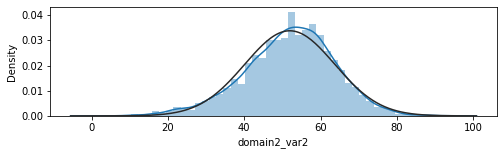

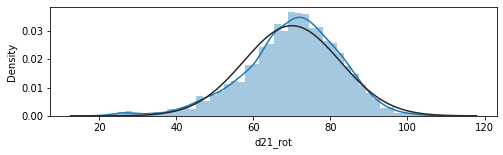

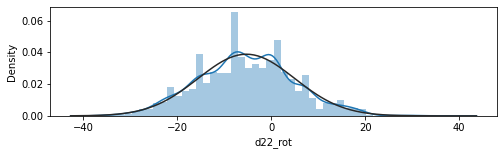

In [ ]:
from scipy.stats import norm
for col in targets.columns:
    plt.figure(figsize=(8, 2))
    sns.distplot(targets[col], fit=norm, kde=True)
    plt.show()

Age is almost normally distributed but for the other targets power transformations can be applied.

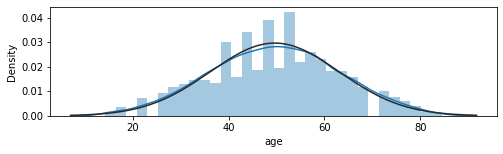

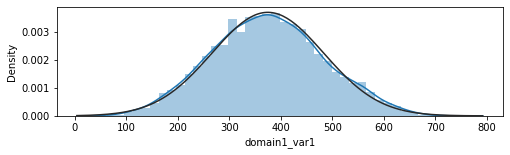

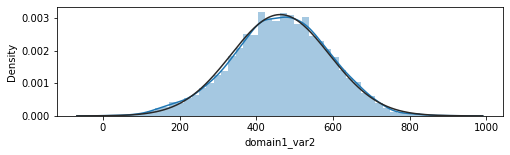

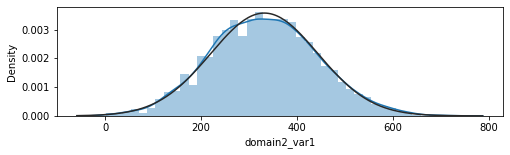

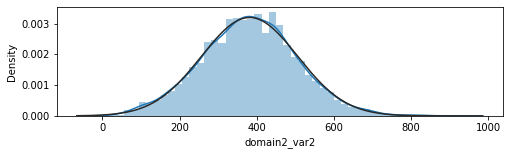

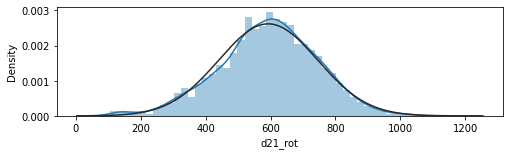

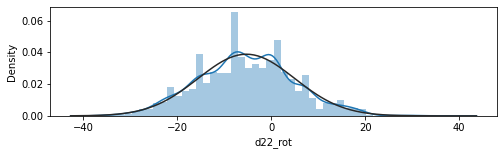

In [ ]:
# Let's apply the power transformation to make the value distribution gaussian
pow_age = 1.0
pow_d1v1 = 1.5
pow_d1v2 = 1.5
pow_d2v1 = 1.5
pow_d2v2 = 1.5
pow_d21 = 1.5
pow_d22 = 1
powers = [pow_age, pow_d1v1, pow_d1v2, pow_d2v1, pow_d2v2, pow_d21, pow_d22 ]

from scipy.stats import norm
for i, col in enumerate(targets.columns):
    plt.figure(figsize=(8, 2))
    sns.distplot(np.power(targets[col], powers[i]), fit=norm, kde=True)
    plt.show()

In [ ]:
for i, col in enumerate(targets.columns):
    targets[col] = np.power(targets[col], powers[i])

In [ ]:
targets = pd.read_csv('train_scores.csv').set_index('Id')

In [ ]:
# Creating the rotated domain2 targets
rot = 0.90771256655
d2 = rotate_origin(targets.iloc[:, 3].values, targets.iloc[:, 4].values, rot)
targets['d21_rot'] = d2[:, 0]
targets['d22_rot'] = d2[:, 1]

In [ ]:
pow_age = 1.0
pow_d1v1 = 1.5
pow_d1v2 = 1.5
pow_d2v1 = 1.5
pow_d2v2 = 1.5
pow_d21 = 1.5
pow_d22 = 1
powers = [pow_age, pow_d1v1, pow_d1v2, pow_d2v1, pow_d2v2, pow_d21, pow_d22 ]

for i, col in enumerate(targets.columns):
    targets[col] = np.power(targets[col], powers[i])

In [ ]:
from sklearn.preprocessing import StandardScaler

# And last but not least, let's scale the target features using ab
scaler = StandardScaler()
targets.iloc[:, :] = scaler.fit_transform(targets)
targets.head()

age  domain1_var1  domain1_var2  ...  domain2_var2   d21_rot   d22_rot
Id                                           ...                                  
10001  0.546728     -1.899398      0.252044  ...     -0.101181  0.228396 -0.486307
10002  0.705146     -0.100839      0.716626  ...      0.511050  1.091555 -0.635136
10004  1.579096      0.117249     -0.161179  ...      0.905470  0.936611  0.244955
10005  1.218620           NaN           NaN  ...      1.634315  1.449477  0.712967
10007 -0.843261     -0.274512      0.544862  ...     -1.459928 -1.458821 -0.514022

[5 rows x 7 columns]

In [ ]:
# Extract ID to separate train and test set
train_id = targets.index.values
sample_submission = pd.read_csv('sample_submission.csv')
test_id = np.unique(sample_submission.Id.str.split('_', expand=True)[0].astype('int'))
print(train_id.shape, test_id.shape)

(5877,) (5877,)


In [ ]:
# Load ICs from the loading file and separate them into train and test set
df_ic = pd.read_csv('loading.csv')
ic_train = df_ic[df_ic.Id.isin(train_id)].set_index('Id')
ic_test = df_ic[df_ic.Id.isin(test_id)].set_index('Id')
print(ic_train.shape, ic_test.shape)

(5877, 26) (5877, 26)


In [ ]:
# Load FNCs from file and separate them into train and test set
df_fnc = pd.read_csv('fnc.csv')
fnc_train = df_fnc[df_fnc.Id.isin(train_id)].set_index('Id')
fnc_test = df_fnc[df_fnc.Id.isin(test_id)].set_index('Id')
print(fnc_train.shape, fnc_test.shape)

(5877, 1378) (5877, 1378)


In [ ]:
def plot_corr_matrix(df_train, df_test, c_restrict=200):

    # Correlation matrix for ICA components
    fig, ax = plt.subplots(ncols=3, figsize=(20, 10))
    abs_max = 1.0
    sns.heatmap(df_train.iloc[:, :c_restrict].corr(), square=True, vmin=-abs_max, vmax=abs_max, cbar=False, ax=ax[0]);
    sns.heatmap(df_test.iloc[:, :c_restrict].corr(), square=True, vmin=-abs_max, vmax=abs_max, cbar=False, ax=ax[1]);
    sns.heatmap(df_train.iloc[:, :c_restrict].corr()-df_test.iloc[:, :c_restrict].corr(),
                square=True, vmin=-0.33, vmax=0.33, cbar=False, ax=ax[2]);
    ax[0].set_title('Train')
    ax[1].set_title('Test')
    ax[2].set_title('Difference (Train - Test)');

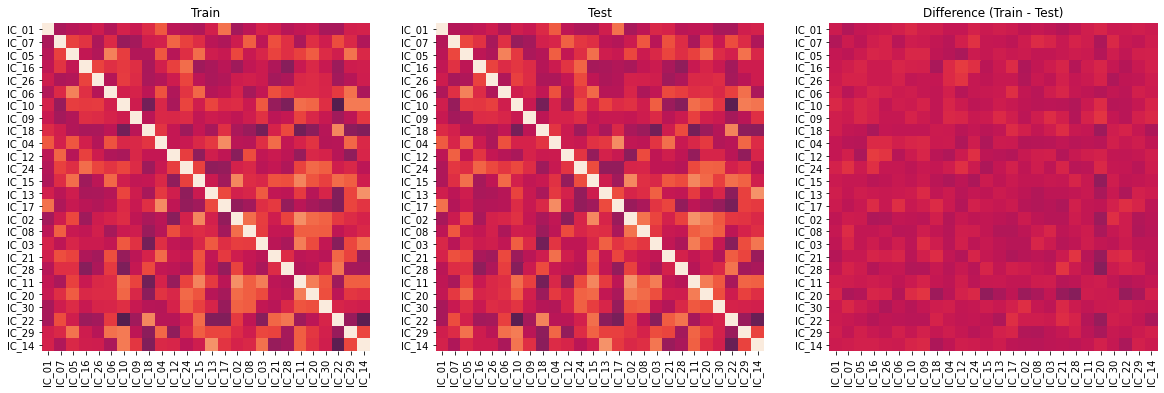

In [ ]:
# Correlation matrix for IC features
plot_corr_matrix(ic_train, ic_test, c_restrict=100)

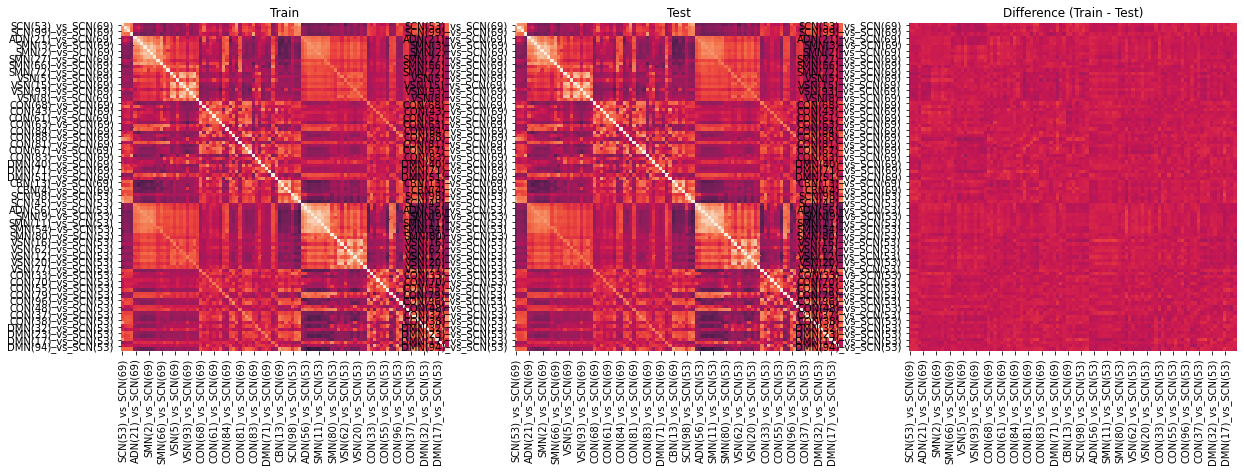

In [ ]:
# Correlation matrix for FNC features
plot_corr_matrix(fnc_train, fnc_test, c_restrict=100)

In [ ]:
def plot_corr_matrix_target(targets, df_train, c_restrict=100):

    # Merge target and feature matrix
    df_temp = pd.merge(targets.reset_index(), df_train.reset_index())
    df_temp = df_temp.set_index('Id').iloc[:, :c_restrict]
    
    # Correlation matrix for ICA components
    plt.figure(figsize=(16, 3))
    sns.heatmap(df_temp.corr().iloc[:7, 7:], square=True,
                vmin=-0.5, vmax=0.5, cbar=False, cmap='Spectral');

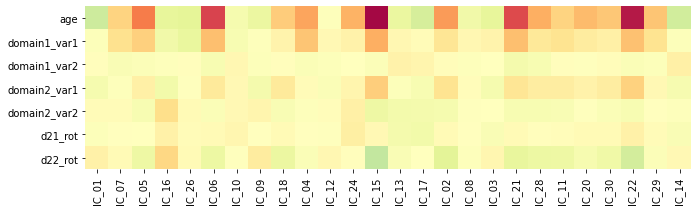

In [ ]:
# Correlation between IC features and targets
plot_corr_matrix_target(targets, ic_train, c_restrict=100)

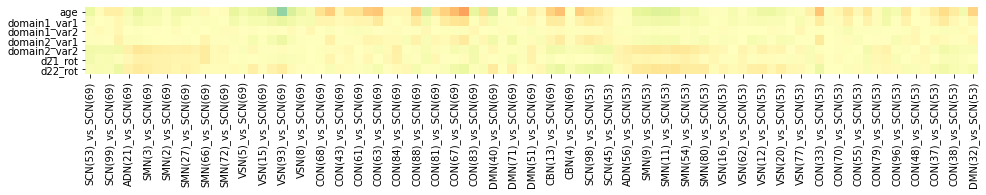

In [ ]:
# Correlation between FNC features and targets
plot_corr_matrix_target(targets, fnc_train, c_restrict=100)

Observation: For both feature types, the correlation with age seems to be the highest. Let's explore this in a bit more detail. What is the highest correlation features can reach with the 5 targets?

In [ ]:
# Show highest correlation with target variables and IC dataset
df_corr = pd.concat([np.abs(ic_train.corrwith(targets.iloc[:, i])).sort_values(ascending=False).reset_index(drop=True) for i in range(7)], axis=1)
df_corr.columns = targets.columns
df_corr.head(5)

age  domain1_var1  domain1_var2  ...  domain2_var2   d21_rot   d22_rot
0  0.484878      0.198873      0.048145  ...      0.098232  0.053485  0.158532
1  0.459589      0.166566      0.043628  ...      0.070011  0.051020  0.128911
2  0.386976      0.165851      0.040150  ...      0.049889  0.044975  0.115078
3  0.374197      0.162729      0.035031  ...      0.048493  0.043401  0.102217
4  0.276462      0.152668      0.034161  ...      0.043046  0.043359  0.089306

[5 rows x 7 columns]

In [ ]:
# Show highest correlation with target variables and FNC dataset
df_corr = pd.concat([np.abs(fnc_train.corrwith(targets.iloc[:, i])).sort_values(ascending=False).reset_index(drop=True) for i in range(7)], axis=1)
df_corr.columns = targets.columns
df_corr.head(5)

age  domain1_var1  domain1_var2  ...  domain2_var2   d21_rot   d22_rot
0  0.233295      0.106117      0.057434  ...      0.087313  0.061891  0.093365
1  0.216757      0.088149      0.047272  ...      0.076245  0.058278  0.088047
2  0.187374      0.080494      0.046367  ...      0.075907  0.057373  0.085910
3  0.185799      0.080198      0.044078  ...      0.075646  0.054899  0.084926
4  0.175652      0.074104      0.043954  ...      0.075274  0.049758  0.084670

[5 rows x 7 columns]

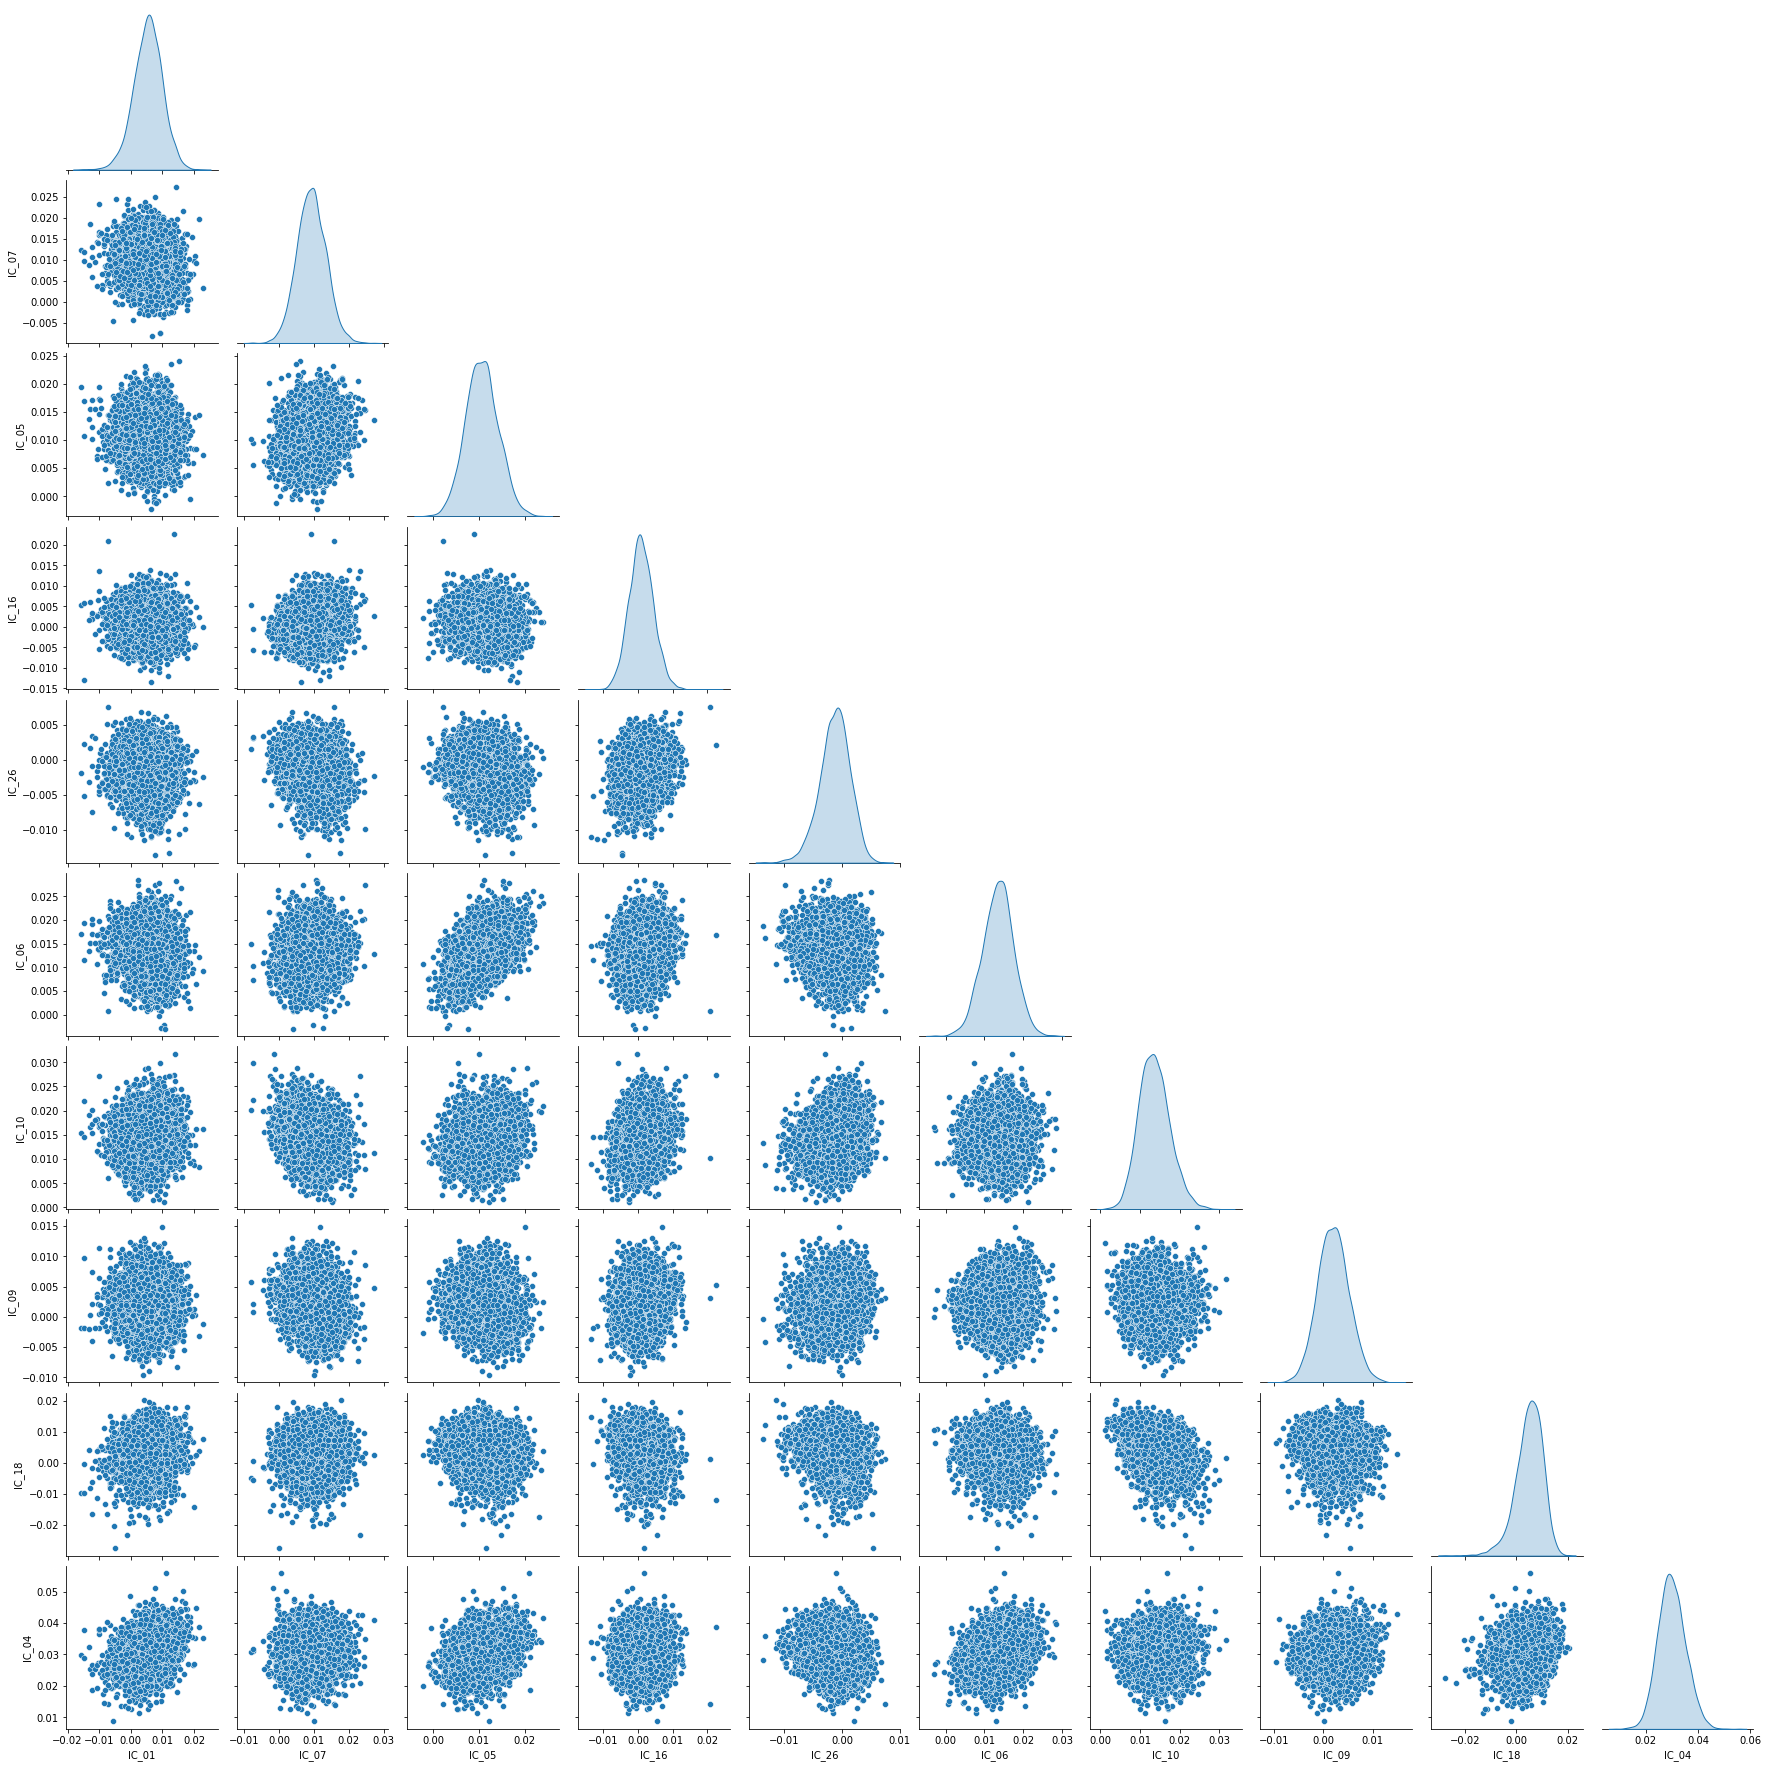

In [ ]:
#Explore between features and targets
# Number of columns to investigate
n_invest = 10
sns.pairplot(ic_train.iloc[:, :n_invest], diag_kind="kde", corner=True);

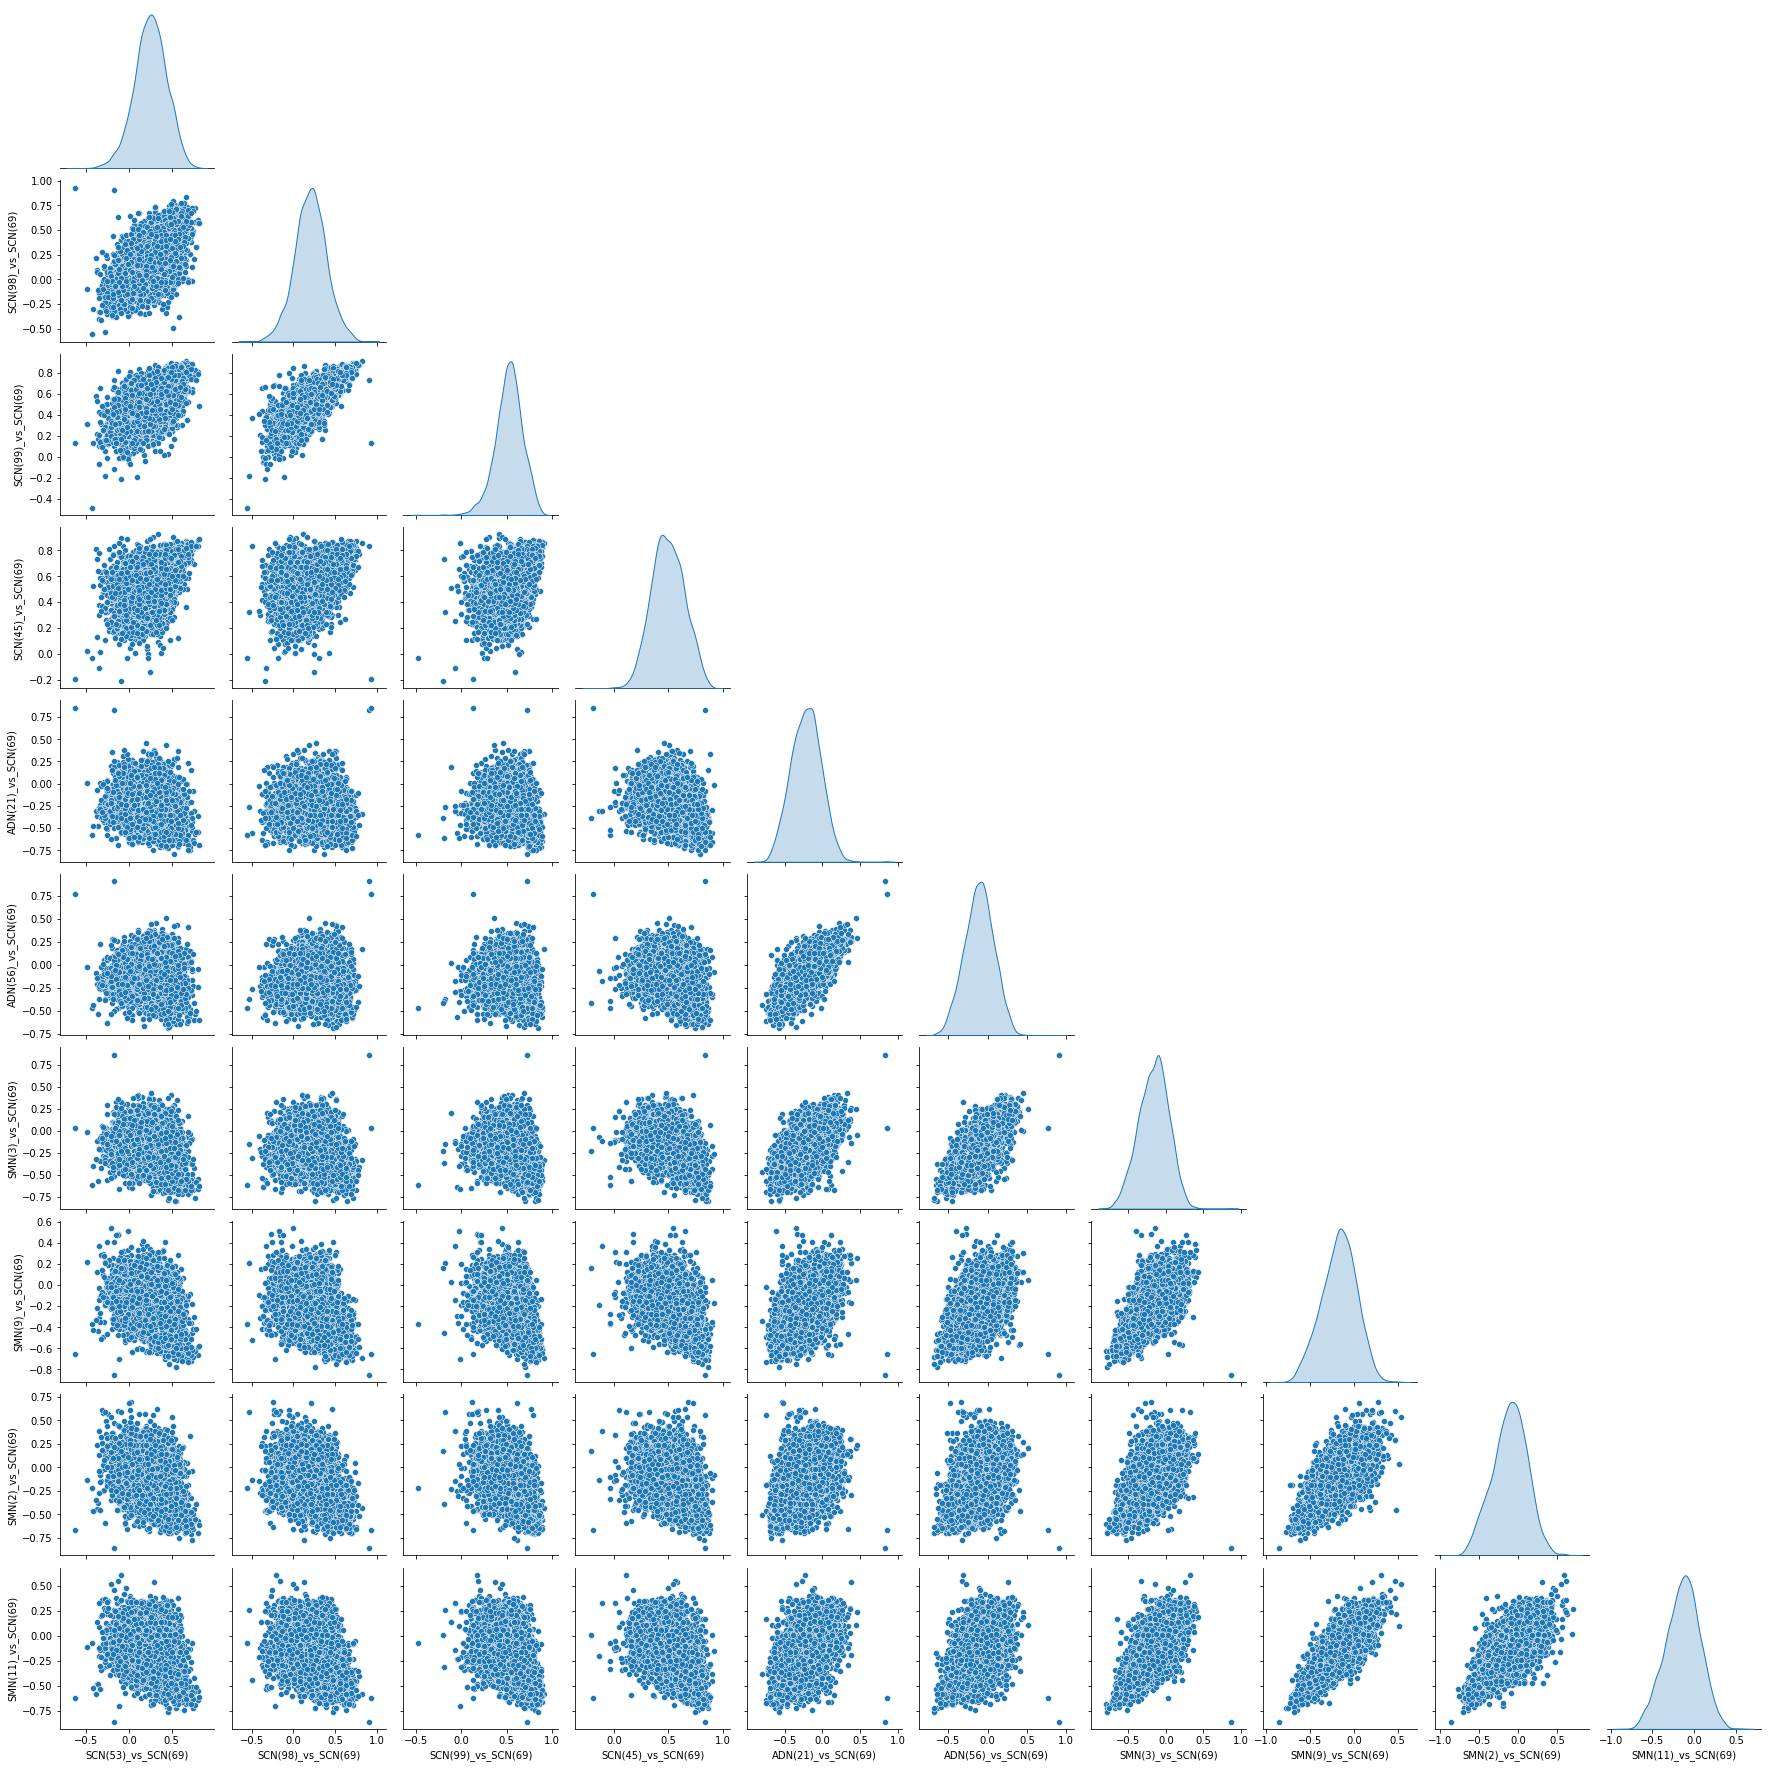

In [ ]:
sns.pairplot(fnc_train.iloc[:, :n_invest], diag_kind="kde", corner=True);

In [ ]:
def plot_markers(key, df_temp, ncolmarker=5, split_at=5, plot_max=15):

    # Restrict dataframe to first X features
    df_temp = df_temp.iloc[:, :plot_max]

    # Compute dataset selecters
    ncolumns = np.arange(df_temp.shape[1])
    selecter = np.split(ncolumns, ncolumns[::split_at][1:])

    for s in selecter:

        print(key, s)
        df_temp.iloc[:, s].plot(kind='line',subplots=True, sharex=True, marker='.', lw=0,
                                ms=10, markeredgecolor='k', markeredgewidth=0.3,
                     figsize=(5 * ncolmarker, 4 * df_temp.iloc[:, s].shape[1]//ncolmarker), layout=(-1,ncolmarker));
        plt.show()

Visualization of IC features: [0 1 2 3 4]


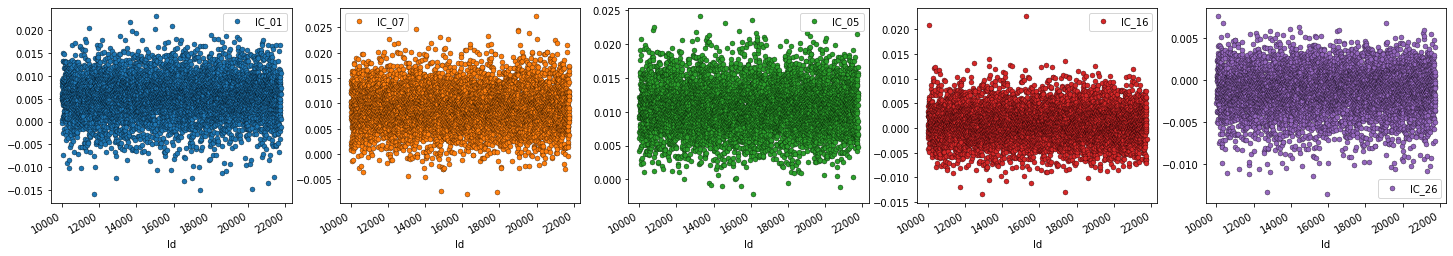

Visualization of IC features: [5 6 7 8 9]


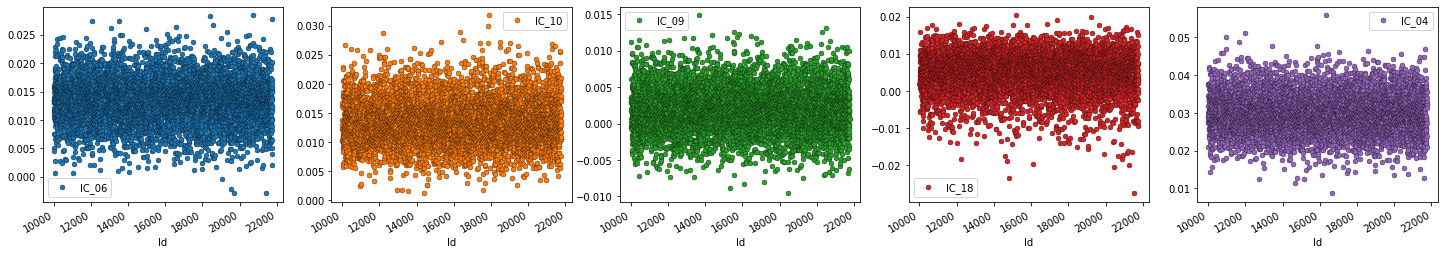

Visualization of IC features: [10 11 12 13 14]


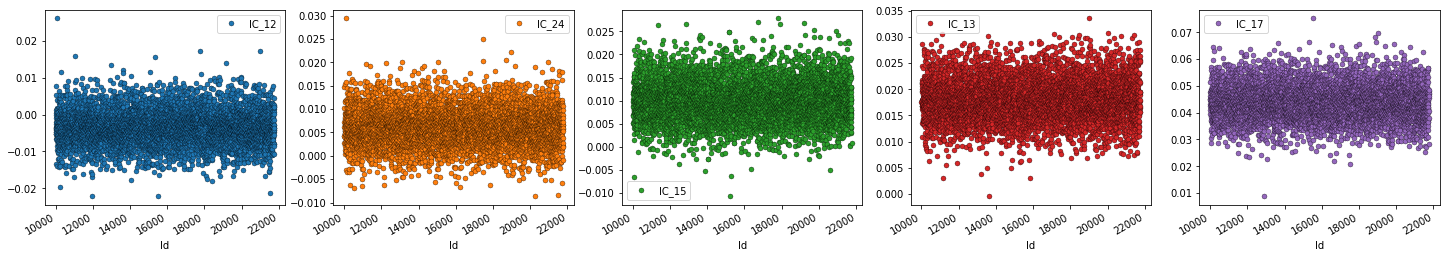

In [ ]:
plot_markers('Visualization of IC features:', ic_train)

Conclusion 1 The datasets seem to contain a few outliers. We will take care of them at the very end.

In [ ]:
import warnings
warnings.filterwarnings("ignore")

#!pip install pycaret[full]

In [ ]:
from sklearn.model_selection import KFold
from pycaret.regression import *

In [ ]:
fnc_df = pd.read_csv("fnc.csv")
loading_df = pd.read_csv("loading.csv")
labels_df = pd.read_csv("train_scores.csv")

In [ ]:
fnc_features, loading_features = list(fnc_df.columns[1:]), list(loading_df.columns[1:])
df = fnc_df.merge(loading_df, on="Id")
labels_df["is_train"] = True
df = df.merge(labels_df, on="Id", how="left")

test_df = df[df["is_train"] != True].copy()
df = df[df["is_train"] == True].copy()
print(f'Shape of train data: {df.shape}, Shape of test data: {test_df.shape}')

Shape of train data: (5877, 1411), Shape of test data: (5877, 1411)


In [ ]:
target_cols = ['age', 'domain1_var1', 'domain1_var2', 'domain2_var1', 'domain2_var2']
df.drop(['is_train'], axis=1, inplace=True)
test_df = test_df.drop(target_cols + ['is_train'], axis=1)


# Giving less importance to FNC features since they are easier to overfit due to high dimensionality.
FNC_SCALE = 1/500
df[fnc_features] *= FNC_SCALE
test_df[fnc_features] *= FNC_SCALE

In [ ]:
def get_train_data(target):
    other_targets = [tar for tar in target_cols if tar != target]
    train_df = df.drop( other_targets, axis=1)
    return train_df

In [ ]:
def get_test_data(target):
    other_targets = [tar for tar in target_cols if tar != target]
    test_df = df.drop(other_targets, axis=1)
    return test_df

In [ ]:
blacklist_models = ['ransac', 'tr', 'rf', 'et', 'ada', 'gbr', 'xgboost', 'catboost']

Firstly predicting Age Column

In [ ]:
target = target_cols[0]
train_df = get_train_data(target)

setup_reg = setup(
    data = train_df,
    target = target,
    train_size=0.8,
    numeric_imputation = 'mean',
    silent = True
)

compare_models(
    exclude = blacklist_models,
    fold = 7,
    sort = 'MAE',
    turbo=True
)

Model      MAE       MSE     RMSE      R2  \
br                         Bayesian Ridge   7.2216   83.9673   9.1625  0.5390   
lr                      Linear Regression   7.4333   88.9397   9.4296  0.5116   
omp           Orthogonal Matching Pursuit   7.5781   91.4875   9.5634  0.4975   
lightgbm  Light Gradient Boosting Machine   7.9415  100.2763  10.0121  0.4503   
lar                Least Angle Regression   9.3246  137.3686  11.6807  0.2484   
ridge                    Ridge Regression  10.0247  155.8980  12.4826  0.1467   
llar         Lasso Least Angle Regression  10.9514  183.3140  13.5352 -0.0032   
lasso                    Lasso Regression  10.9528  183.3485  13.5365 -0.0034   
en                            Elastic Net  10.9528  183.3485  13.5365 -0.0034   
knn                 K Neighbors Regressor  11.8247  216.4205  14.7077 -0.1854   
dt                Decision Tree Regressor  12.2715  240.8423  15.5160 -0.3200   
huber                     Huber Regressor  13.3299  273.9405  16.5442 -0.5008   
par          Passive Aggressive Regressor  18.2122  496.4402  21.8521 -1.7346   

           RMSLE    MAPE  TT (Sec)  
br        0.2077  0.1690   12.0071  
lr        0.2132  0.1736    1.4443  
omp       0.2151  0.1760    0.2600  
lightgbm  0.2261  0.1873   23.4357  
lar       0.2576  0.2121    0.7286  
ridge     0.2759  0.2405    0.2600  
llar      0.2956  0.2620    0.2357  
lasso     0.2956  0.2620    0.1000  
en        0.2956  0.2620    0.0971  
knn       0.3163  0.2792    0.8957  
dt        0.3460  0.2778    4.6200  
huber     0.3526  0.2999    1.6257  
par       0.4873  0.4043    0.2814

BayesianRidge(alpha_1=1e-06, alpha_2=1e-06, alpha_init=None,
              compute_score=False, copy_X=True, fit_intercept=True,
              lambda_1=1e-06, lambda_2=1e-06, lambda_init=None, n_iter=300,
              normalize=False, tol=0.001, verbose=False)

In [ ]:
br_age = create_model(
    estimator='br',
    fold=7
)

MAE      MSE    RMSE      R2   RMSLE    MAPE
0     7.3952  86.8613  9.3199  0.5274  0.2142  0.1761
1     7.2512  85.0088  9.2200  0.5115  0.2112  0.1727
2     7.3134  85.4820  9.2456  0.4867  0.2081  0.1715
3     7.0527  81.5999  9.0333  0.5781  0.2099  0.1682
4     7.2215  84.5686  9.1961  0.5525  0.2030  0.1620
5     6.9149  79.6215  8.9231  0.5816  0.1993  0.1616
6     7.4023  84.6292  9.1994  0.5350  0.2080  0.1708
Mean  7.2216  83.9673  9.1625  0.5390  0.2077  0.1690
SD    0.1668   2.3004  0.1262  0.0320  0.0047  0.0050

In [ ]:
tuned_br_age = tune_model(
    br_age,
    optimize = 'MAE'
)

MAE      MSE    RMSE      R2   RMSLE    MAPE
0     7.4726  88.5865  9.4120  0.5222  0.2168  0.1792
1     7.2510  83.5231  9.1391  0.5109  0.2094  0.1716
2     7.2532  85.5629  9.2500  0.5340  0.2134  0.1731
3     7.3195  86.2327  9.2862  0.4915  0.2075  0.1719
4     7.2081  82.6754  9.0926  0.5440  0.2061  0.1663
5     6.9952  81.0941  9.0052  0.5819  0.2164  0.1744
6     7.1186  83.2501  9.1242  0.5384  0.1956  0.1547
7     6.8454  76.6587  8.7555  0.5855  0.1923  0.1562
8     6.9400  81.1613  9.0090  0.5720  0.1985  0.1594
9     7.6573  86.9607  9.3253  0.5368  0.2175  0.1817
Mean  7.2061  83.5706  9.1399  0.5417  0.2073  0.1688
SD    0.2334   3.2913  0.1810  0.0290  0.0087  0.0089

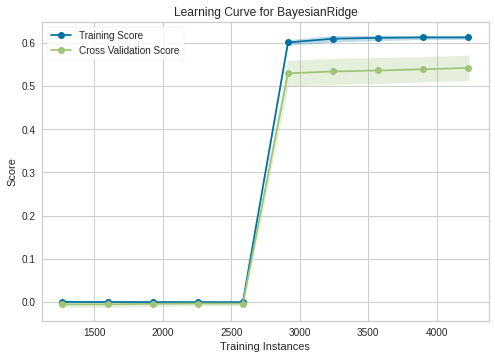

In [ ]:
plot_model(tuned_br_age,plot = 'learning')

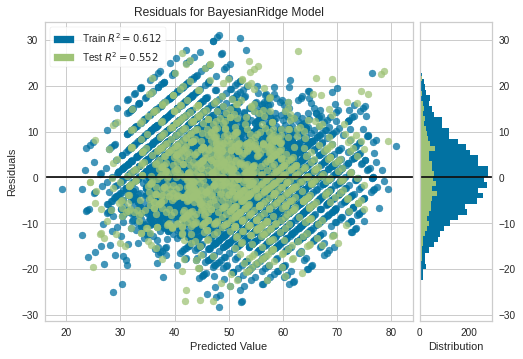

In [ ]:
plot_model(tuned_br_age, plot = 'residuals')

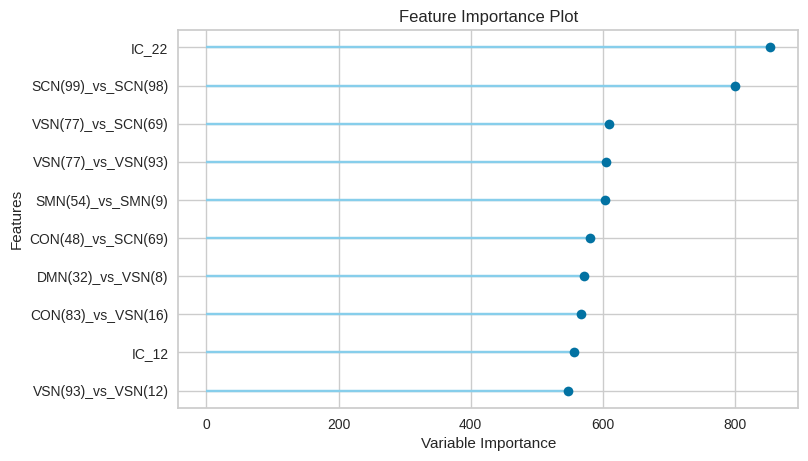

In [ ]:
plot_model(tuned_br_age,plot = 'feature')

In [ ]:
predictions =  predict_model(tuned_br_age, data=test_df)

In [ ]:
predictions[['Id','Label']].head()

Id      Label
0  10001  59.474825
1  10002  55.448526
3  10004  51.613642
4  10005  61.466521
6  10007  43.489244

Predicting the other targets

In [ ]:
target = target_cols[1]
train_df = get_train_data(target)

setup_reg = setup(
    data = train_df,
    target = target,
    train_size=0.8,
    numeric_imputation = 'mean',
    silent = True
)

compare_models(
    exclude = blacklist_models,
    fold = 7,
    sort = 'MAE',
    turbo = True
)

Model      MAE       MSE     RMSE      R2  \
lr                      Linear Regression   7.9718   98.2628   9.9092  0.0561   
lightgbm  Light Gradient Boosting Machine   8.0441  101.2370  10.0576  0.0277   
ridge                    Ridge Regression   8.0639  101.6507  10.0795  0.0239   
llar         Lasso Least Angle Regression   8.1654  104.1991  10.2051 -0.0006   
lasso                    Lasso Regression   8.1665  104.2244  10.2063 -0.0009   
en                            Elastic Net   8.1665  104.2245  10.2063 -0.0009   
br                         Bayesian Ridge   8.1665  104.2245  10.2063 -0.0009   
omp           Orthogonal Matching Pursuit   8.2324  104.6860  10.2293 -0.0061   
lar                Least Angle Regression   8.8099  121.8917  11.0300 -0.1718   
knn                 K Neighbors Regressor   8.9080  124.7856  11.1659 -0.1978   
dt                Decision Tree Regressor  11.5106  205.8595  14.3441 -0.9819   
huber                     Huber Regressor  11.7670  211.3167  14.5313 -1.0369   
par          Passive Aggressive Regressor  17.7839  537.6939  21.2851 -4.1995   

           RMSLE    MAPE  TT (Sec)  
lr        0.2039  0.1712    0.9729  
lightgbm  0.2071  0.1733   21.8271  
ridge     0.2081  0.1745    0.2471  
llar      0.2104  0.1767    0.2129  
lasso     0.2104  0.1767    0.0986  
en        0.2104  0.1767    0.0957  
br        0.2104  0.1767    5.3057  
omp       0.2097  0.1760    0.2443  
lar       0.2243  0.1872    0.7371  
knn       0.2276  0.1916    0.7443  
dt        0.2966  0.2420    4.9014  
huber     0.2989  0.2403    1.2286  
par       0.3804  0.3751    0.2629

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=-1, normalize=False)

In [ ]:
target = target_cols[2]
train_df = get_train_data(target)

setup_reg = setup(
    data = train_df,
    target = target,
    train_size=0.8,
    numeric_imputation = 'mean',
    silent = True
)

compare_models(
    exclude = blacklist_models,
    fold = 7,
    sort = 'MAE',
    turbo = True
)

Model      MAE        MSE     RMSE  \
ridge                    Ridge Regression   8.9819   129.7974  11.3902   
llar         Lasso Least Angle Regression   8.9835   129.9352  11.3964   
lasso                    Lasso Regression   8.9852   129.9476  11.3969   
en                            Elastic Net   8.9852   129.9476  11.3969   
br                         Bayesian Ridge   8.9852   129.9475  11.3969   
lr                      Linear Regression   9.1672   135.3448  11.6293   
lightgbm  Light Gradient Boosting Machine   9.2818   137.9302  11.7402   
omp           Orthogonal Matching Pursuit   9.5181   145.0133  12.0407   
lar                Least Angle Regression   9.8399   156.3796  12.4992   
knn                 K Neighbors Regressor   9.8758   155.9514  12.4839   
dt                Decision Tree Regressor  13.0096   270.9788  16.4586   
huber                     Huber Regressor  13.0182   257.2465  16.0360   
par          Passive Aggressive Regressor  27.1453  1223.1772  31.6457   

              R2   RMSLE    MAPE  TT (Sec)  
ridge    -0.0030  0.2132  0.1748    0.2529  
llar     -0.0041  0.2133  0.1749    0.2271  
lasso    -0.0042  0.2133  0.1749    0.1014  
en       -0.0042  0.2133  0.1749    0.0957  
br       -0.0042  0.2133  0.1749    4.8443  
lr       -0.0457  0.2166  0.1778    0.9729  
lightgbm -0.0654  0.2180  0.1794   21.3529  
omp      -0.1215  0.2228  0.1841    0.2486  
lar      -0.2105  0.2294  0.1893    0.7471  
knn      -0.2051  0.2298  0.1900    0.7500  
dt       -1.0967  0.3106  0.2437    6.1443  
huber    -0.9888  0.2924  0.2369    1.6657  
par      -8.5634  0.4598  0.5032    0.2543

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=2896, solver='auto', tol=0.001)

In [ ]:
target = target_cols[3]
train_df = get_train_data(target)

setup_reg = setup(
    data = train_df,
    target = target,
    train_size=0.8,
    numeric_imputation = 'mean',
    silent = True
)

compare_models(
    exclude = blacklist_models,
    fold = 7,
    sort = 'MAE',
    turbo = True
)

Model      MAE        MSE     RMSE  \
lr                      Linear Regression   8.7266   122.4763  11.0623   
ridge                    Ridge Regression   8.7723   122.3906  11.0595   
llar         Lasso Least Angle Regression   8.8143   123.3962  11.1049   
lasso                    Lasso Regression   8.8176   123.4757  11.1084   
en                            Elastic Net   8.8176   123.4758  11.1085   
br                         Bayesian Ridge   8.8176   123.4759  11.1085   
lightgbm  Light Gradient Boosting Machine   8.9887   128.6039  11.3365   
omp           Orthogonal Matching Pursuit   9.0185   130.4594  11.4169   
lar                Least Angle Regression   9.6606   152.9678  12.2470   
knn                 K Neighbors Regressor   9.7739   150.6502  12.2700   
huber                     Huber Regressor  11.8489   214.6693  14.6498   
dt                Decision Tree Regressor  12.6182   250.4788  15.8240   
par          Passive Aggressive Regressor  27.4493  1051.5146  31.3310   

              R2   RMSLE    MAPE  TT (Sec)  
lr        0.0019  0.2747  0.2518    0.9986  
ridge     0.0026  0.2756  0.2549    0.2629  
llar     -0.0056  0.2764  0.2559    0.2400  
lasso    -0.0062  0.2765  0.2560    0.1057  
en       -0.0062  0.2765  0.2560    0.1014  
br       -0.0062  0.2765  0.2560    5.2029  
lightgbm -0.0484  0.2805  0.2610   21.8986  
omp      -0.0637  0.2809  0.2579    0.2614  
lar      -0.2517  0.2972  0.2662    0.7643  
knn      -0.2288  0.2975  0.2772    0.8586  
huber    -0.7536  0.3471  0.3149    1.3114  
dt       -1.0455  0.3889  0.3383    6.5357  
par      -7.7324  0.6817  0.6598    0.3000

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=-1, normalize=False)

In [ ]:
target = target_cols[4]
train_df = get_train_data(target)

setup_reg = setup(
    data = train_df,
    target = target,
    train_size=0.8,
    numeric_imputation = 'mean',
    silent = True
)

compare_models(
    exclude = blacklist_models,
    fold = 7,
    sort = 'MAE',
    turbo = True
)

Model      MAE       MSE     RMSE      R2  \
ridge                    Ridge Regression   9.3375  139.7081  11.8137  0.0014   
lasso                    Lasso Regression   9.3547  140.1698  11.8333 -0.0019   
en                            Elastic Net   9.3547  140.1698  11.8333 -0.0019   
br                         Bayesian Ridge   9.3547  140.1697  11.8332 -0.0019   
llar         Lasso Least Angle Regression   9.3548  140.1478  11.8324 -0.0018   
lr                      Linear Regression   9.3989  142.4966  11.9310 -0.0186   
lightgbm  Light Gradient Boosting Machine   9.5588  146.4587  12.0965 -0.0472   
omp           Orthogonal Matching Pursuit   9.7011  151.5192  12.3042 -0.0836   
knn                 K Neighbors Regressor  10.2941  167.6892  12.9451 -0.1999   
huber                     Huber Regressor  12.3591  236.5343  15.3113 -0.6951   
dt                Decision Tree Regressor  13.3746  284.7394  16.8726 -1.0414   
lar                Least Angle Regression  13.5646  388.9106  17.0850 -1.7224   
par          Passive Aggressive Regressor  17.8866  494.6787  21.9381 -2.5505   

           RMSLE    MAPE  TT (Sec)  
ridge     0.2599  0.2294    0.2629  
lasso     0.2602  0.2298    0.1000  
en        0.2602  0.2298    0.1000  
br        0.2602  0.2298    5.1686  
llar      0.2602  0.2298    0.2414  
lr        0.2613  0.2298    1.0029  
lightgbm  0.2638  0.2320   21.9386  
omp       0.2673  0.2343    0.2600  
knn       0.2792  0.2478    0.9114  
huber     0.3250  0.2833    1.5614  
dt        0.3747  0.3073    6.5029  
lar       0.3698  0.3105    0.7471  
par       0.4188  0.4143    0.3486

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=1199, solver='auto', tol=0.001)

In [ ]:
models = []

target_models_dict = {
    'age': 'br',
    'domain1_var1':'lr',
    'domain1_var2':'llar',
    'domain2_var1':'lr',
    'domain2_var2':'lr',
}

def tune_and_ensemble(target):
    train_df = get_train_data(target)    
    exp_reg = setup(
        data = train_df,
        target = target,
        train_size=0.8,
        numeric_imputation = 'mean',
        silent = True
    )
    model_name = target_models_dict[target]
    mod = create_model(model_name,fold=7)
    tuned_model = tune_model(mod, fold=7, optimize = 'MAE')
    model = ensemble_model(tuned_model, fold=7, optimize = 'MAE', choose_better = True)
    return model

In [ ]:
for target in target_cols:
    model = tune_and_ensemble(target)
    models.append(model)

MAE       MSE     RMSE      R2   RMSLE    MAPE
0     9.3610  138.5257  11.7697  0.0139  0.2531  0.2140
1     9.6725  153.2238  12.3784 -0.0102  0.2782  0.2363
2     9.4576  145.0455  12.0435  0.0224  0.2596  0.2172
3     9.0164  129.7455  11.3906 -0.0140  0.2351  0.1958
4     9.6759  156.7300  12.5192 -0.0245  0.3006  0.3180
5     8.8304  131.6123  11.4722  0.0241  0.2550  0.2115
6     9.2856  139.6698  11.8182  0.0056  0.2550  0.2151
Mean  9.3285  142.0789  11.9131  0.0025  0.2624  0.2297
SD    0.2938    9.4699   0.3960  0.0176  0.0195  0.0377

In [ ]:
models

[BayesianRidge(alpha_1=0.3, alpha_2=0.05, alpha_init=None, compute_score=True,
               copy_X=True, fit_intercept=True, lambda_1=0.001, lambda_2=0.001,
               lambda_init=None, n_iter=300, normalize=False, tol=0.001,
               verbose=False),
 BaggingRegressor(base_estimator=LinearRegression(copy_X=True,
                                                  fit_intercept=True, n_jobs=-1,
                                                  normalize=False),
                  bootstrap=True, bootstrap_features=False, max_features=1.0,
                  max_samples=1.0, n_estimators=10, n_jobs=None, oob_score=False,
                  random_state=6041, verbose=0, warm_start=False),
 LassoLars(alpha=1.0, copy_X=True, eps=0.1, fit_intercept=True, fit_path=True,
           jitter=None, max_iter=500, normalize=False, positive=False,
           precompute='auto', random_state=5597, verbose=False),
 BaggingRegressor(base_estimator=LinearRegression(copy_X=True,
                    

In [ ]:
def finalize_model_pipeline(model, target):
    # this will train the model on houldout data
    finalize_model(model)
    save_model(model, f'{target}_{target_models_dict[target]}', verbose=True)
    # making predictions on test data
    predictions = predict_model(model, data=test_df)
    test_df[target] = predictions['Label'].values

In [ ]:
for index, target in enumerate(target_cols):
    model = models[index]
    finalize_model_pipeline(model,target)

Transformation Pipeline and Model Succesfully Saved
Transformation Pipeline and Model Succesfully Saved
Transformation Pipeline and Model Succesfully Saved
Transformation Pipeline and Model Succesfully Saved
Transformation Pipeline and Model Succesfully Saved


In [ ]:
sub_df = pd.melt(test_df[["Id", "age", "domain1_var1", "domain1_var2", "domain2_var1", "domain2_var2"]], id_vars=["Id"], value_name="Predicted")
sub_df["Id"] = sub_df["Id"].astype("str") + "_" +  sub_df["variable"].astype("str")

sub_df = sub_df.drop("variable", axis=1).sort_values("Id")
assert sub_df.shape[0] == test_df.shape[0]*5

sub_df.to_csv("submission1.csv", index=False)

sub_df.head(15)

Id  Predicted
0               10001_age  60.437719
5877   10001_domain1_var1  55.747002
11754  10001_domain1_var2  58.867254
17631  10001_domain2_var1  52.402325
23508  10001_domain2_var2  52.973206
1               10002_age  56.459742
5878   10002_domain1_var1  54.347107
11755  10002_domain1_var2  58.867298
17632  10002_domain2_var1  42.891003
23509  10002_domain2_var2  52.814781
2               10004_age  49.283354
5879   10004_domain1_var1  51.527699
11756  10004_domain1_var2  58.867386
17633  10004_domain2_var1  47.064919
23510  10004_domain2_var2  47.931854

In [ ]:
models[0].get_params()

{'alpha_1': 0.3,
 'alpha_2': 0.05,
 'alpha_init': None,
 'compute_score': True,
 'copy_X': True,
 'fit_intercept': True,
 'lambda_1': 0.001,
 'lambda_2': 0.001,
 'lambda_init': None,
 'n_iter': 300,
 'normalize': False,
 'tol': 0.001,
 'verbose': False}

In [ ]:
age_train_df = get_train_data('age')
preds = predict_model(models[0], data=age_train_df)
preds

Id  SCN(53)_vs_SCN(69)  ...        age      Label
0      10001            0.000737  ...  57.436077  60.437719
1      10002            0.000303  ...  59.580851  56.459742
3      10004            0.000266  ...  71.413018  49.283354
4      10005            0.000584  ...  66.532630  60.101492
6      10007            0.000047  ...  38.617381  43.854435
...      ...                 ...  ...        ...        ...
11745  21746            0.000079  ...  14.257265  34.208077
11746  21747            0.000484  ...  55.456978  51.788921
11749  21750            0.000456  ...  48.948756  41.229733
11751  21752            0.000237  ...  66.532630  57.338510
11753  21754            0.001089  ...  68.820928  68.058953

[5877 rows x 1407 columns]

In [ ]:
np.mean(np.sum(np.abs(preds['age'] - preds['Label']), axis=0)/np.sum(preds['age'], axis=0))

0.13503084329806847

In [ ]:
predictions = []
op = 'Label'
overall = 0.0
for i in range(5):
    train_df = get_train_data(target_cols[i])
    preds = predict_model(models[i], data=train_df)
    predictions.append(preds)
    score = np.mean(np.sum(np.abs(preds[target_cols[i]] - preds[op]), axis=0)/np.sum(preds[target_cols[i]], axis=0))
    overall+=score
    print(f'{target_cols[i]}: \t{score}')
print(f"Overall score = {overall/5}")

age: 	0.13503084329806847
domain1_var1: 	0.14772916374056982
domain1_var2: 	0.1514328450554519
domain2_var1: 	0.17749236573688815
domain2_var2: 	0.17243403122931356
Overall score = 0.15682384981205838
